####  Practice Project - 3

# Red Wine Quality Prediction 

* Problem Statement:
  The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues,       only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine   brand, wine selling price, etc.).

  This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal     wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to     test feature selection methods.

In [35]:
# import important libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings 
warnings.filterwarnings('ignore')

In [36]:
# read file from github
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

* as we can see it's a classification problem as label contains catagorical data and also mentioned in problem ststement

In [37]:
# checking shape of the df
df.shape

(1599, 12)

* here we have 1599 rows and 12 columns

In [38]:
# checking info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* i can se that there is no null value in any column

In [39]:
# checking stats of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* i can see mean and std looks good of every column except 'free sulfurdioxide' and 'total sulfurdioxide' it means data is not     normally distributed in these columns, i will confirm it graphically
* quantile range of some columns don't look good either the have outliers or data is not distributed normally , i will check it graphically  

### EDA (Exploratory data analysis)

In [40]:
# checking skewness of data
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. and here in most of the column(residual sugar ,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,volatile acidity,fixed acidity) data is highly skewed. i will check it graphically

In [41]:
# checking correlation
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

* here we can see half of the columns are negatively correlated with label.

### Checking Outliers, Correlation and Skewness Graphically

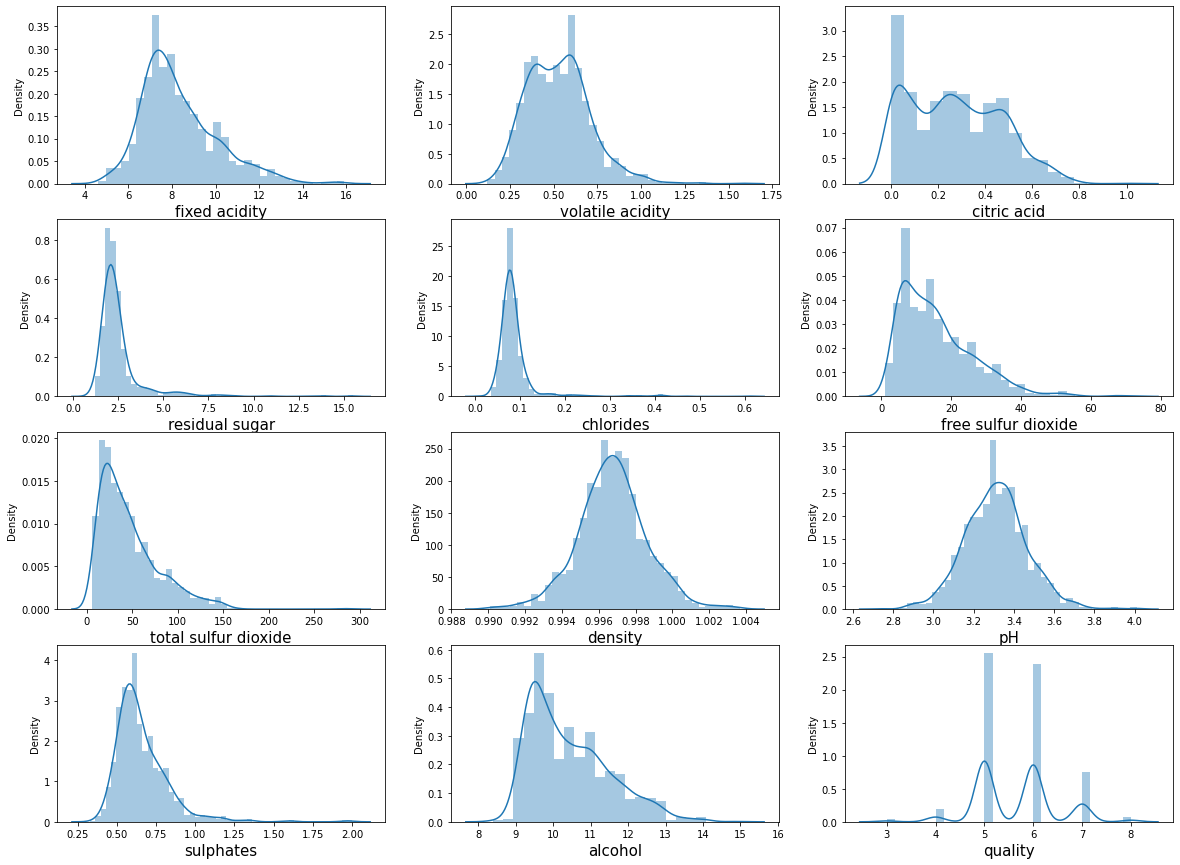

In [42]:
# let's see data distribution for every row
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()  

* here i can see residual sugar ,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,volatile acidity,fixed acidity are right skewed 

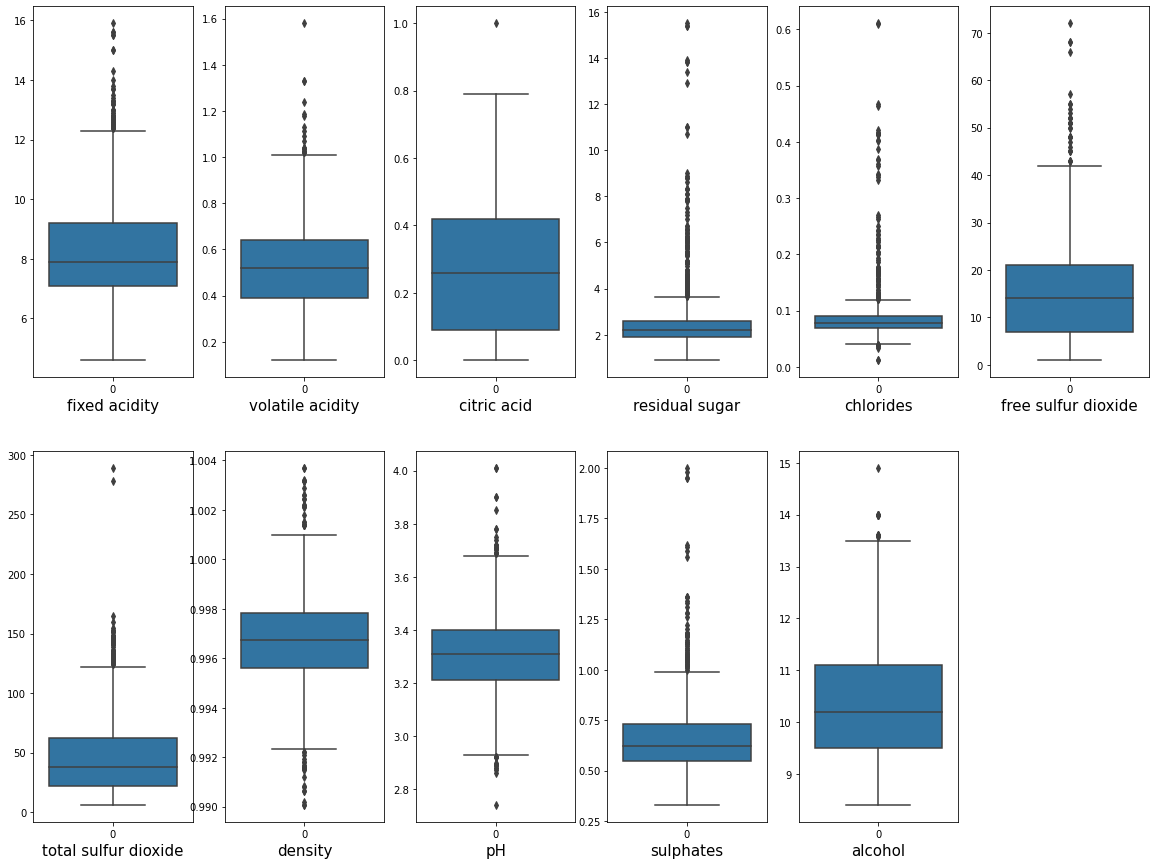

In [43]:
# checking outliers
plt.figure(figsize=(20,15))
graph = 1
for column in df:
    if graph<=11:
        plt.subplot(2,6,graph)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show() 

* here i can see evey column contains outliers

<AxesSubplot:>

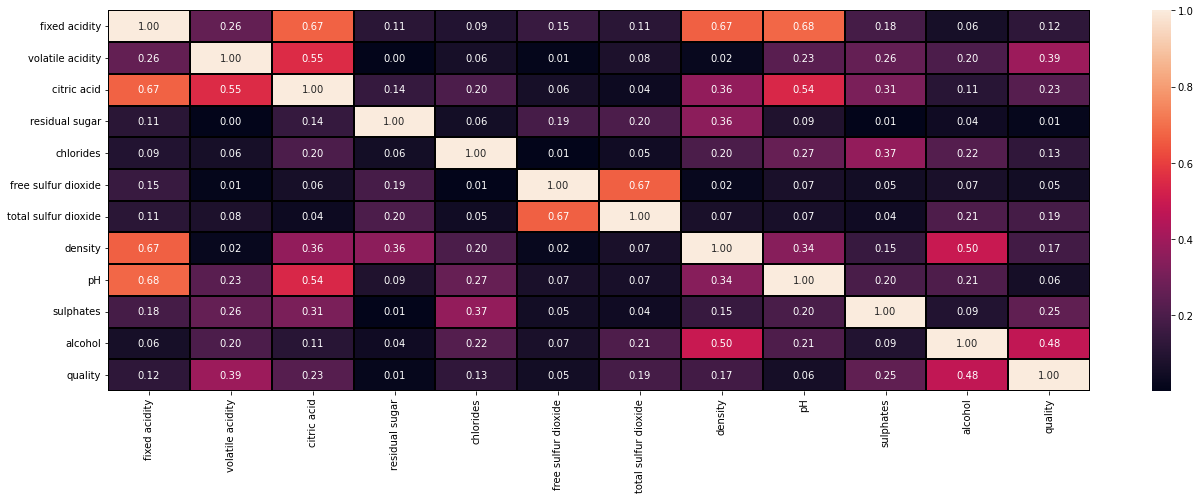

In [44]:
# checking Correlation
plt.figure(figsize=(22,7))
sns.heatmap(df.corr().abs(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

* here i see some features are correlated to each other . so i will remove some of them which are very less correlated with 'quality'

* i will remove 'pH','residual sugar','fixed acidity','free sulfur dioxide','citric acid' as they are less correlated with label(quality) and highly correlated with each other

### Data Cleaning

In [45]:
# removing unwanted columns
new_df = df.drop(columns=[ 'pH','residual sugar','fixed acidity','free sulfur dioxide','citric acid'])

In [49]:
# new_df shape
new_df.shape

(1599, 7)

In [50]:
new_df.columns

Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

* so after feature selection i will go with these features

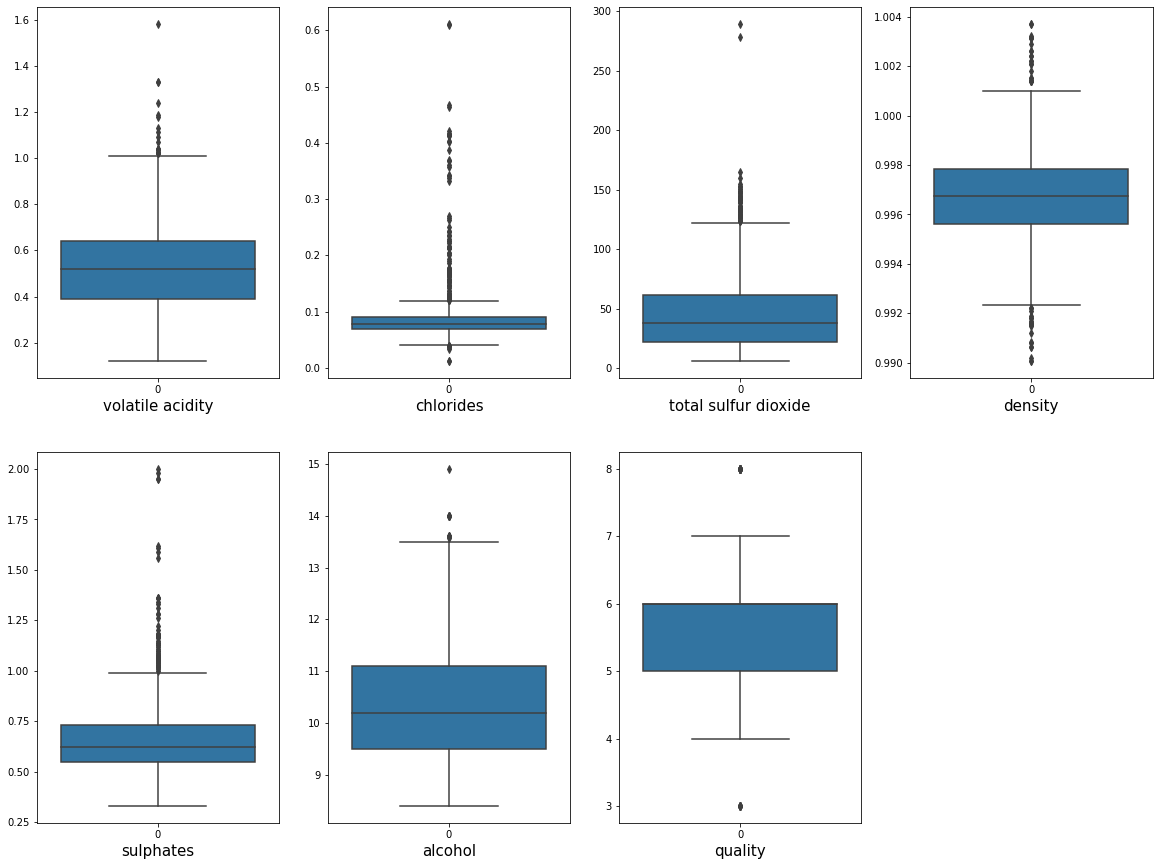

In [51]:
# checking outliers
plt.figure(figsize=(20,15))
graph = 1
for column in new_df:
    if graph<=7:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = new_df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show() 

In [52]:
# let's remove outliers from these 

In [53]:
# selecting quantile range for alcohol column
min_a, max_a = new_df.alcohol.quantile([0.000, 0.98])
min_a, max_a

(8.4, 12.9)

In [54]:
# removing rows containing ouotliers
new_df = new_df[(new_df.alcohol<max_a)&(new_df.alcohol>min_a)]

<AxesSubplot:xlabel='alcohol'>

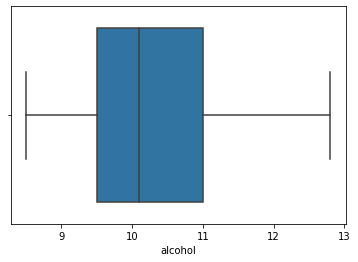

In [55]:
# checking outliers
sns.boxplot(x=new_df['alcohol'])

* outliers are removed

In [56]:
# selecting quantile range for volatile acidity column
min_v, max_v = new_df['volatile acidity'].quantile([0.000, 0.976])
min_v, max_v

(0.12, 0.9291199999999993)

In [57]:
# removing rows containing ouotliers
new_df = new_df[(new_df['volatile acidity']<max_v)&(new_df['volatile acidity']>min_v)]

<AxesSubplot:xlabel='volatile acidity'>

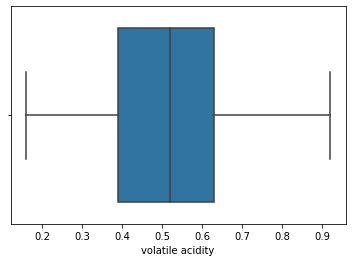

In [58]:
# checking outliers
sns.boxplot(x=new_df['volatile acidity'])

In [59]:
# selecting quantile range for total sulfur dioxide column
min_t, max_t = new_df['total sulfur dioxide'].quantile([0.000, 0.93])
min_t, max_t

(6.0, 104.0)

<AxesSubplot:xlabel='total sulfur dioxide'>

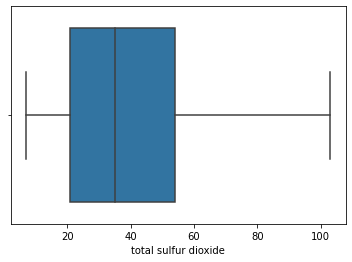

In [60]:
# removing rows containing ouotliers
new_df = new_df[(new_df['total sulfur dioxide']<max_t)&(new_df['total sulfur dioxide']>min_t)]
# checking outliers
sns.boxplot(x=new_df['total sulfur dioxide'])

In [61]:
# selecting quantile range for sulphates column
min_s, max_s = new_df['sulphates'].quantile([0.000, 0.94])
min_s, max_s

(0.33, 0.9)

<AxesSubplot:xlabel='sulphates'>

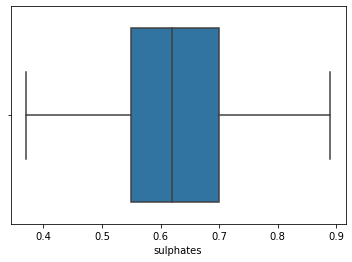

In [62]:
# removing rows containing ouotliers
new_df = new_df[(new_df['sulphates']<max_s)&(new_df['sulphates']>min_s)]
# checking outliers
sns.boxplot(x=new_df['sulphates'])

In [65]:
# selecting quantile range for column chlorides
min_ch, max_ch = new_df['chlorides'].quantile([0.12, 0.90])
min_ch, max_ch

(0.063, 0.103)

<AxesSubplot:xlabel='chlorides'>

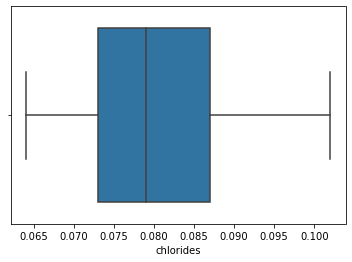

In [66]:
# removing rows containing ouotliers
new_df = new_df[(new_df['chlorides']<max_ch)&(new_df['chlorides']>min_ch)]
# checking outliers
sns.boxplot(x=new_df['chlorides'])

In [67]:
# selecting quantile range for column
min_d, max_d = new_df['density'].quantile([0.01, 0.97])
min_d, max_d

(0.993364, 1.0002488)

<AxesSubplot:xlabel='density'>

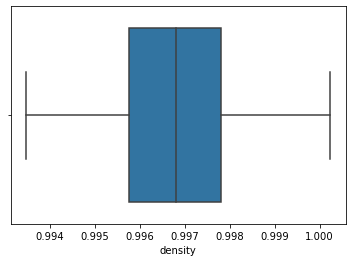

In [68]:
# removing rows containing ouotliers
new_df = new_df[(new_df['density']<max_d)&(new_df['density']>min_d)]
# checking outliers
sns.boxplot(x=new_df['density'])

* all the outliers are removed from features

In [293]:
#let's work on skewness 
#let's check the skewness first

In [69]:
#checking shape of new df
new_df.shape

(963, 7)

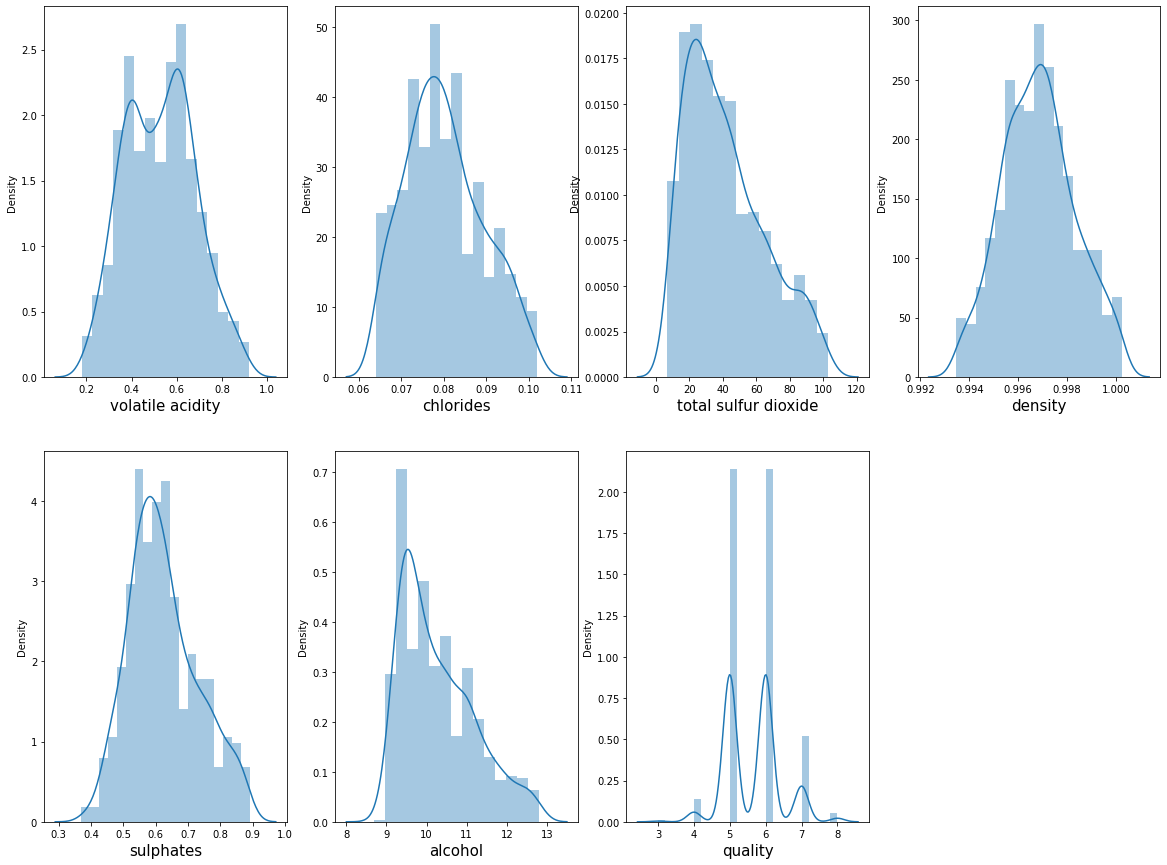

In [70]:
# checking skewness
plt.figure(figsize=(20,15))
plotnumber = 1
for column in new_df:
    if plotnumber<=7:
        plt.subplot(2,4,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show() 

* i can see skewness is removed as i removed outliers

####  Now i am ready for model building

sacling the data

In [72]:
#separate features and label
x = new_df.drop(columns = ['quality'])
y = new_df['quality']

In [75]:
# scaling data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [76]:
x_scaled.shape

(963, 6)

* now we will go to model testing phase our data before that let's split our data

In [77]:
# spliting data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

##### Logistic Regression

In [78]:
# training data with logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [79]:
# predicting y_test
y_pred = log_reg.predict(x_test)

In [80]:
# checking model accuracy
accuracy = accuracy_score(y_test,y_pred) 
accuracy

0.6556016597510373

* according to me model accuracy is not up to the mark . i guess data has some variance

In [82]:
# chcek classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.66      0.75      0.70        99
           6       0.66      0.66      0.66       117
           7       0.58      0.39      0.47        18
           8       0.00      0.00      0.00         3

    accuracy                           0.66       241
   macro avg       0.38      0.36      0.37       241
weighted avg       0.63      0.66      0.64       241



accuracy is 66% but is can be increased by hyper parameter tuning 

##### knn

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

knn = KNeighborsClassifier()

In [88]:
# creating confusion matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 0,  2,  2,  0,  0],
       [ 0, 74, 25,  0,  0],
       [ 0, 36, 77,  4,  0],
       [ 0,  0, 11,  7,  0],
       [ 0,  0,  2,  1,  0]], dtype=int64)

we have very less type 1 and type 2 error columns , its good for the model

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.66      0.75      0.70        99
           6       0.66      0.66      0.66       117
           7       0.58      0.39      0.47        18
           8       0.00      0.00      0.00         3

    accuracy                           0.66       241
   macro avg       0.38      0.36      0.37       241
weighted avg       0.63      0.66      0.64       241



cross validation of model(to remove over fittng)

In [90]:
from sklearn.model_selection import KFold,cross_val_score

In [93]:
cross_val_score(knn,x_scaled,y,cv=15)

array([0.56923077, 0.43076923, 0.6       , 0.59375   , 0.546875  ,
       0.5       , 0.625     , 0.5625    , 0.5       , 0.46875   ,
       0.546875  , 0.4375    , 0.5625    , 0.46875   , 0.59375   ])

In [94]:
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.5223121761658032

score is less not good for model lets do Hyperparameter Tuning

### Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }

In [98]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [99]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [100]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

lets use these parameters

In [101]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors=13)

In [102]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [103]:
y_pred = knn.predict(x_test)

In [104]:
cfm = confusion_matrix(y_test,y_pred)

In [105]:
cfm

array([[ 0,  3,  1,  0,  0],
       [ 0, 75, 24,  0,  0],
       [ 0, 39, 71,  7,  0],
       [ 0,  1, 13,  4,  0],
       [ 0,  0,  3,  0,  0]], dtype=int64)

errors are reduced 

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.64      0.76      0.69        99
           6       0.63      0.61      0.62       117
           7       0.36      0.22      0.28        18
           8       0.00      0.00      0.00         3

    accuracy                           0.62       241
   macro avg       0.33      0.32      0.32       241
weighted avg       0.60      0.62      0.61       241



In [107]:
# model_accuracy reduced 

##### decision tree

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=44)

In [110]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
# training score
clf.score(x_train,y_train)

1.0

In [112]:
# move to prediction part
y_pred = clf.predict(x_test)

# check the accuracy
accuracy_score(y_test,y_pred)

0.5892116182572614

In [120]:
# we are tuning hyper parameter now by passing different values for both parameters
drid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,20),
    'min_samples_leaf': range(2,15),
    'min_samples_split': range(3,15),
    'max_leaf_nodes': range(5,15)
}

In [121]:
grid_search = GridSearchCV(estimator=clf,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [122]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9,
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(3, 15)})

In [123]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


* these are the best parameter for decision tree for this model

In [124]:
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==================== Train Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===================== Test Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test, pred,digits=2))

In [125]:
# initaiting DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'gini',min_samples_split=3,max_depth=10,min_samples_leaf=2,max_leaf_nodes=10)

# train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=2,
                       min_samples_split=3)

In [126]:
# call the function and pass dataset to check the train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score



==================== Train Result =======================
Accuracy score :64.82%

===================== Test Result =======================
Accuracy score :56.85%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.57      0.72      0.64       100
           6       0.56      0.55      0.56       114
           7       1.00      0.10      0.17        21
           8       0.00      0.00      0.00         3

    accuracy                           0.57       241
   macro avg       0.35      0.23      0.23       241
weighted avg       0.59      0.57      0.54       241



we get msx accuracy by logistic regression 

In [129]:
# saveing the model
import pickle
filename = 'redwinw.pkl'
pickle.dump(log_reg, open(filename,'wb'))